In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
# observed probability density X=[0, 10]; normalized.
# 
obs = np.array([0.001, 0.02, 0.047, 0.12, 0.16, 0.17, 0.14, 0.075, 0.096, 0.0902, 0.0808])
obs /= obs.sum() 
obsProb = obs 
print(obsProb)

[0.001  0.02   0.047  0.12   0.16   0.17   0.14   0.075  0.096  0.0902
 0.0808]


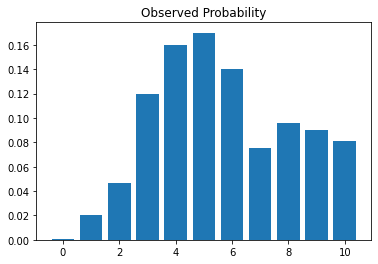

In [56]:
plt.bar(np.arange(len(obsProb)), obsProb);
plt.title("Observed Probability");

Question: What distribution model would be good for this observed distribution?